In [180]:
import pandas as pd
import matplotlib.pyplot as plt

In [181]:
models = pd.read_pickle("models-df.pkl")
models.head(5)

,area,problem,model,version,size,path,ops
0,text,machine_comprehension,bert-squad,bertsquad-10.onnx,435852734,C:\ONNX\models\text\machine_comprehension\bert...,"{MatMul, Concat, Shape, OneHot, Reshape, Reduc..."
1,text,machine_comprehension,bert-squad,bertsquad-12-int8.onnx,124565601,C:\ONNX\models\text\machine_comprehension\bert...,"{MatMul, Concat, Shape, MatMulInteger, Dequant..."
2,text,machine_comprehension,bert-squad,bertsquad-12.onnx,435852736,C:\ONNX\models\text\machine_comprehension\bert...,"{MatMul, Concat, Shape, OneHot, Reshape, Reduc..."
3,text,machine_comprehension,bert-squad,bertsquad-8.onnx,435882893,C:\ONNX\models\text\machine_comprehension\bert...,"{MatMul, Concat, Shape, Reshape, ReduceMean, G..."
4,text,machine_comprehension,bidirectional_attention_flow,bidaf-9.onnx,43522228,C:\ONNX\models\text\machine_comprehension\bidi...,"{MatMul, Concat, ReduceSum, Shape, CategoryMap..."


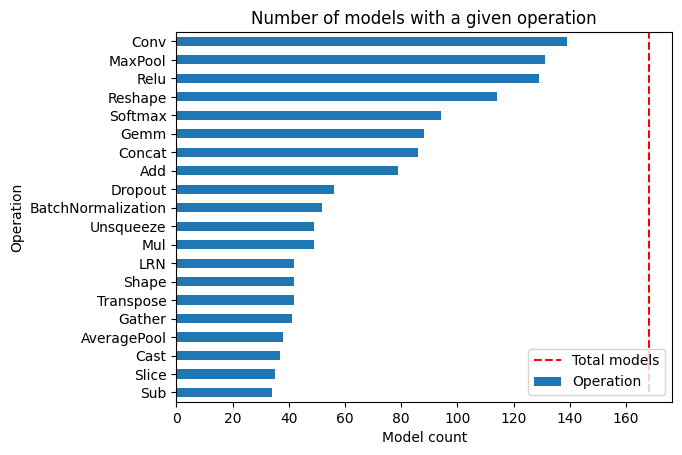

In [182]:
model_ops = [list(ops) for ops in models["ops"].values.tolist()]

pd.Series(sum(model_ops, [])).value_counts(ascending=True).tail(20).plot.barh(label="Operation")
plt.title("Number of models with a given operation")
plt.xlabel("Model count");
plt.ylabel("Operation")
plt.vlines(len(models), 0, 20, colors="red", linestyles="dashed", label="Total models")
plt.legend();

In [183]:
implemented = set([
    "Add",
    "AveragePool",
    "BatchNormalization",
    "Concat",
    "Constant",
    "Conv",
    "Clip",
    "Div",
    "Dropout",
    "Gemm",
    "MatMul",
    "MaxPool",
    "Mul",
    "Relu",
    "Reshape",
    "Softmax",
    "Squeeze",
    "Sub",
    "Sum",
    "Transpose",
    "Unsqueeze",
    "Identity",
    "Shape",
    "Flatten",
    #"LeakyRelu",
])

models["missing_ops"] = models["ops"].apply(lambda ops: ops - implemented)
models["missing_ops_len"] = models["missing_ops"].apply(lambda mops: len(mops))

In [184]:
# exclude implemented models
models_implemented = [
    "mnist-1.onnx",
    "mnist-7.onnx",
    "mnist-8.onnx",
    "mnist-12.onnx",

    "super-resolution-10.onnx",

    "squeezenet1.1-7.onnx",

    "shufflenet-3.onnx",
    "shufflenet-6.onnx",
    "shufflenet-7.onnx",
    "shufflenet-8.onnx",
    "shufflenet-9.onnx",

    "emotion-ferplus-2.onnx",
    "emotion-ferplus-7.onnx",
    "emotion-ferplus-8.onnx",

    "inception-v2-3.onnx",
    "inception-v2-6.onnx",
    "inception-v2-7.onnx",
    "inception-v2-8.onnx",
    "inception-v2-9.onnx",

    "resnet50-caffe2-v1-3.onnx",
    "resnet50-caffe2-v1-6.onnx",
    "resnet50-caffe2-v1-7.onnx",
    "resnet50-caffe2-v1-8.onnx",
    "resnet50-caffe2-v1-9.onnx",

    "ResNet101-DUC-7.onnx",
    "ResNet101-DUC-12.onnx",

    # too big, try later maybe?
    "vgg_ilsvrc_16_gender_imdb_wiki.onnx",
    "vgg_ilsvrc_16_age_imdb_wiki.onnx",
    "vgg_ilsvrc_16_age_chalearn_iccv2015.onnx",

    "vgg19-caffe2-3.onnx",
    "vgg19-caffe2-6.onnx",
    "vgg19-caffe2-7.onnx",
    "vgg19-caffe2-8.onnx",
    "vgg19-caffe2-9.onnx",

    "efficientnet-lite4-11.onnx",

    "vgg16-7.onnx",
    "vgg16-12.onnx",
]

models = models[models["version"].apply(lambda n: n not in models_implemented)]

In [185]:
print("Total models:", len(models))
print("Runnable models with implemented ops:", len(models[models["missing_ops_len"] == 0]))
models.sort_values(["missing_ops_len", "size"]).head(50)

Total models: 131
Runnable models with implemented ops: 3


,area,problem,model,version,size,path,ops,missing_ops,missing_ops_len
114,vision,classification,vgg,vgg16-bn-7.onnx,553512191,C:\ONNX\models\vision\classification\vgg\model...,"{Gemm, MaxPool, Dropout, Conv, Flatten, Relu, ...",{},0
115,vision,classification,vgg,vgg19-7.onnx,574677321,C:\ONNX\models\vision\classification\vgg\model...,"{Gemm, MaxPool, Dropout, Conv, Flatten, Relu}",{},0
116,vision,classification,vgg,vgg19-bn-7.onnx,574774380,C:\ONNX\models\vision\classification\vgg\model...,"{Gemm, MaxPool, Dropout, Conv, Flatten, Relu, ...",{},0
107,vision,classification,squeezenet,squeezenet1.0-7.onnx,4952222,C:\ONNX\models\vision\classification\squeezene...,"{GlobalAveragePool, MaxPool, Dropout, Concat, ...",{GlobalAveragePool},1
108,vision,classification,squeezenet,squeezenet1.0-8.onnx,4952222,C:\ONNX\models\vision\classification\squeezene...,"{GlobalAveragePool, MaxPool, Dropout, Concat, ...",{GlobalAveragePool},1
109,vision,classification,squeezenet,squeezenet1.0-9.onnx,4952222,C:\ONNX\models\vision\classification\squeezene...,"{GlobalAveragePool, MaxPool, Dropout, Concat, ...",{GlobalAveragePool},1
105,vision,classification,squeezenet,squeezenet1.0-3.onnx,4952238,C:\ONNX\models\vision\classification\squeezene...,"{GlobalAveragePool, MaxPool, Dropout, Concat, ...",{GlobalAveragePool},1
106,vision,classification,squeezenet,squeezenet1.0-6.onnx,4952238,C:\ONNX\models\vision\classification\squeezene...,"{GlobalAveragePool, MaxPool, Dropout, Concat, ...",{GlobalAveragePool},1
104,vision,classification,squeezenet,squeezenet1.0-12.onnx,4952956,C:\ONNX\models\vision\classification\squeezene...,"{GlobalAveragePool, MaxPool, Dropout, Concat, ...",{GlobalAveragePool},1
13,vision,body_analysis,age_gender,gender_googlenet.onnx,23935566,C:\ONNX\models\vision\body_analysis\age_gender...,"{Gemm, MaxPool, Dropout, Concat, Conv, Average...",{LRN},1


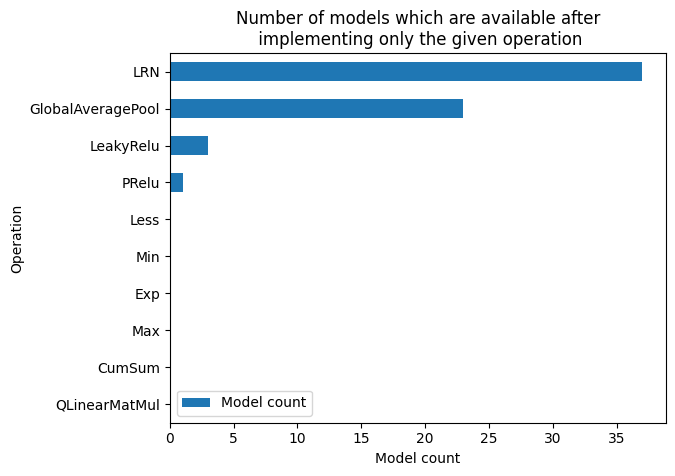

In [186]:
# Which op to consider next?

available_ops = set(sum(model_ops, [])) - implemented
y = []

for op in available_ops:
    y.append(models["missing_ops"].apply(lambda mops: mops == { op }).sum())

pd.Series(y, index=available_ops).sort_values().tail(10).plot.barh(label="Model count")
plt.title("Number of models which are available after\n implementing only the given operation")
plt.xlabel("Model count");
plt.ylabel("Operation")
plt.legend();